# CS171 - Winter 2022 - Assignment 1
### Instructor: Vagelis Papalexakis
### TA: Yorgos Tsitsikas

### Credit for  Assignment 1: 5/40 points of the final grade


In this first assignment you will explore a dataset, visualizing the dataset in various ways, and doing a preliminary analysis on the data. 

For this assignment we are going to use the functionality of Pandas (the library, *not* the unbearably cute animal): https://pandas.pydata.org/ in order to manipulate datasets.
In addition to Pandas, we are going to use Matplotlib (https://matplotlib.org/) and Numpy (http://www.numpy.org/) and you may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.

Unless you are explicitly asked to *implement* a particular functionality, you may assume that you may use an existing implementation from the libraries above (or some other library that you may find, as long as you *document* it).

Before you start, make sure you have installed all those packages in your local Jupyter instance, as follows:

conda install numpy pandas matplotlib seaborn

## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


In [1]:
pip install numpy pandas matplotlib seaborn

You should consider upgrading via the '/Users/amir/jupyter/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
import seaborn as sea
import random as rand
import math
#make sure you import here everything else you may need

## Question 0: Getting real data [0%] 

In this assignment you are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, you are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris


In [3]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)
df=data
data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Question 1: Data Visualization [20%]

### Question 1a: Scatterplots [10%]
1. Plot the scatterplot of all pairs of features and color the points by class label [5%]
2. Which pair of features is (visually) the most correlated?  [2.5%]
3. Can you think of a reason why looking at this plot would be useful in a task where we would have to classify flowers by label? [2.5%]

<function matplotlib.pyplot.show(close=None, block=None)>

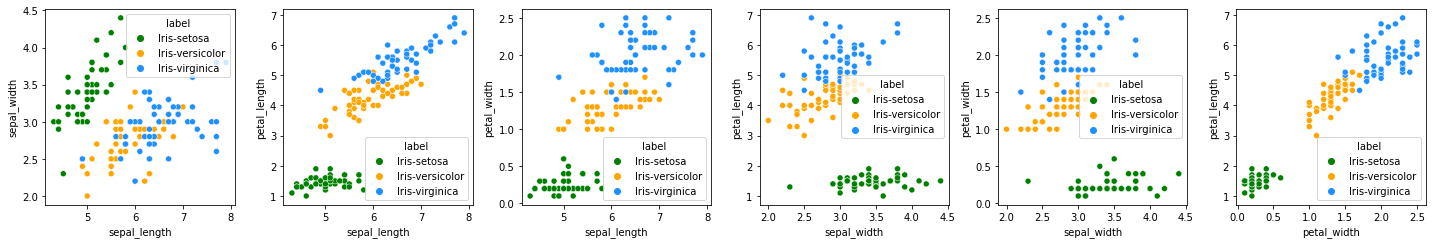

In [4]:
#your code here
plot.rcParams["figure.figsize"] = [20, 3.5]
plot.rcParams["figure.autolayout"] = True
f, axes = plot.subplots(1, 6)
color_dict = dict({'Iris-setosa':'green',
                  'Iris-versicolor': 'orange',
                  'Iris-virginica': 'dodgerblue',})
g1=sea.scatterplot(x="sepal_length", y="sepal_width", hue="label", data=df, palette=color_dict, legend='full', ax=axes[0])
g2=sea.scatterplot(x="sepal_length", y="petal_length", hue="label", data=df, palette=color_dict, legend='full',ax=axes[1])
g3=sea.scatterplot(x="sepal_length", y="petal_width", hue="label", data=df, palette=color_dict, legend='full',ax=axes[2])
g4=sea.scatterplot(x="sepal_width", y="petal_length", hue="label", data=df, palette=color_dict, legend='full', ax=axes[3])
g5=sea.scatterplot(x="sepal_width", y="petal_width", hue="label", data=df, palette=color_dict, legend='full',ax=axes[4])
g6=sea.scatterplot(x="petal_width", y="petal_length", hue="label", data=df, palette=color_dict, legend='full',ax=axes[5])
plot.show


Your answer here:
2. I beleive that graph of petal width vs. petal length has the most correlation.
3. It would be useful to look at this plot because as seen in the plot it is very easy to classify the three types of flower labels, the data for Iris-setosa is seperated and is far away from the data for the other two types, the other two types can also be seperated with a line.

### Question 1b: Boxplot and Histogram [10%]

1. Plot the boxplot for each feature of the dataset (you can put all boxplots on a single figure) [4%]
2. Plot the histogram only for petal length [4%]
3. Does the histogram for petal length give more information than the boxplot? If so, what information? [2%]

/Users/amir/jupyter/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/amir/jupyter/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/amir/jupyter/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/amir/jupy

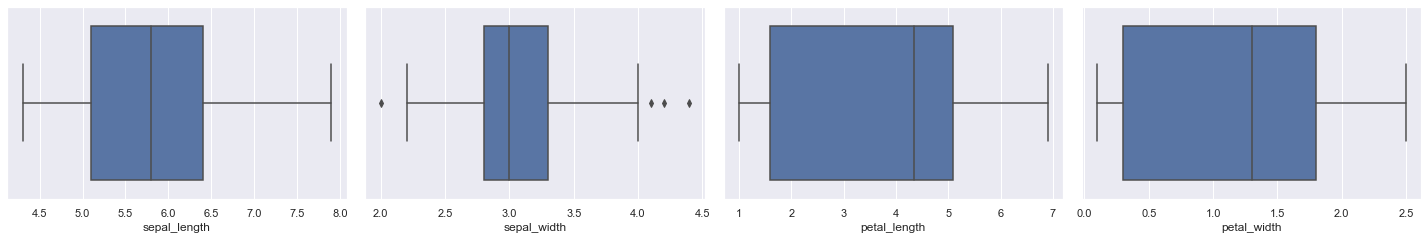

In [5]:
#box plot of all the datasets
sea.set(style="darkgrid")
f, ax_box = plot.subplots(1, 4)
sea.boxplot(df["sepal_length"], ax=ax_box[0])
sea.boxplot(df["sepal_width"], ax=ax_box[1])
sea.boxplot(df["petal_length"], ax=ax_box[2])
sea.boxplot(df["petal_width"], ax=ax_box[3])
plot.show()


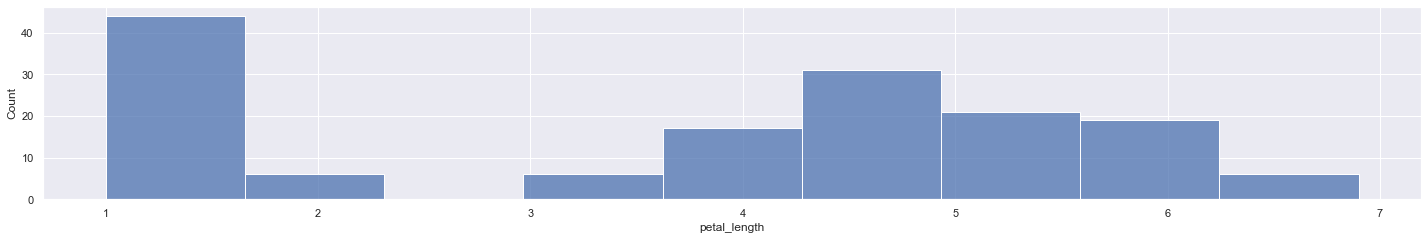

In [6]:
#histogram for petal length
sea.set(style="darkgrid")
f, ax_hist = plot.subplots(1, 1)
sea.histplot(df, x="petal_length", ax=ax_hist)
plot.show()

Your answer here:

3. Yes, the histogram gives more information than the boxplot, it gives an accurate visualization of the count.

## Question 2: Distance computation [40%]



### Question 2a: Implement the Lp distance function [20%]
1. Write code that implements the Lp distance function between two data points as we saw it in class [15%]
2. Verify that it is correct by comparing it for p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [5%]

In [7]:
#your code here
#computing Lp distance between data at location 0 and 50
diff =0
sum = 0
for i in range (4):
    diff = data.loc[0][i] - data.loc[50][i]
    d=abs(diff)
    sum += math.pow(d,2)

print(math.sqrt(sum))

#verifying that the value is correct
print(np.linalg.norm(data.loc[0][0:4]-data.loc[50][0:4]))


4.003748243833521
4.003748243833521


### Question 2b: Compute the distance matrix between all data points [20%]
1. Compute an $N\times N$ distance matrix between all data points (where $N$ is the number of data points) [5%]
2. Plot the above matrix and include a colorbar. [5%]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [5%]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [5%]

/var/folders/vk/tr9t33l577gdzrfwyjryby880000gn/T/ipykernel_48949/1459105776.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plot.colorbar()
/Users/amir/jupyter/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


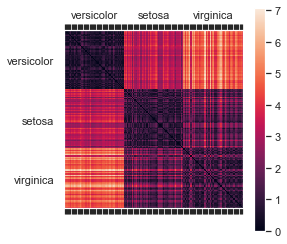

In [8]:
#your code here

#initializing

size = len(data)
matrix=np.zeros((size, size))

#for loop creating NxN matrix with data in it
for i in range (size):
    for j in range (i):
        matrix[i][j] = np.linalg.norm(data.loc[i][0:4]- data.loc[j][0:4])
        matrix[j][i] = matrix[i][j]

#plot of matrices      
plot.matshow(matrix) 

#labeling for matrices 
type_flower = [''] * 150 
type_flower[25] = "versicolor"
type_flower[75] = "setosa"
type_flower[125] = "virginica"

x_ax, y_ax = np.arange(len(type_flower)), np.arange(len(type_flower))
plot.xticks(x_ax,type_flower)
plot.yticks(y_ax,type_flower)

plot.grid(False)
plot.colorbar()
plot.show()

Your answer here:
3. 
4. 

## Question 3: Data Sampling [40%]

Sometimes datasets are too big, or come in a streaming fashion, and it is impossible for us to process every single data point, so we have to resort to sampling methods. In this question, you will implement the popular "reservoir sampling" method, which is mostly used to obtain a uniform random sample of a data stream. Subsequently, you will experiment with sampling directly all the data and conducting stratified sampling (by class label) and observe the results in the data distribution.

### Question 3a: Reservoir Sampling [20%]
1. Implement reservoir sampling as we saw it in class. Create a 'reservoir_sampling' function because it will be useful for the next question. [15%]
2. Run reservoir sampling with reservoir size $M = 15$ and plot the histogram of the petal length feature for the sampled dataset [5%]

In [9]:
##your code here
def reservoir_sampling(stream,M):
    
    #initializing size of the stream
    size_of_stream=0
    
    #initializing array of size M for reservoir 
    reservoir = [0] * M
    
    #appending data to the reservoir array 
    for i in range (M): 
        reservoir[i] = stream[i]
    
    for i in stream:
        #incrementing the size of the stream
        size_of_stream = size_of_stream+1
        
    #changing position of reservoir if needed (chance)
    for j in range (M, size_of_stream):
        rand_x = rand.randint(0,j) 
        if rand_x < M:
            reservoir[rand_x] = stream[j]
    return reservoir


1.4
3.5
5.4
1.5
5.5
1.7
4.9
5.9
1.6
4.6
1.5
4.3
4.1
4.5
1.4


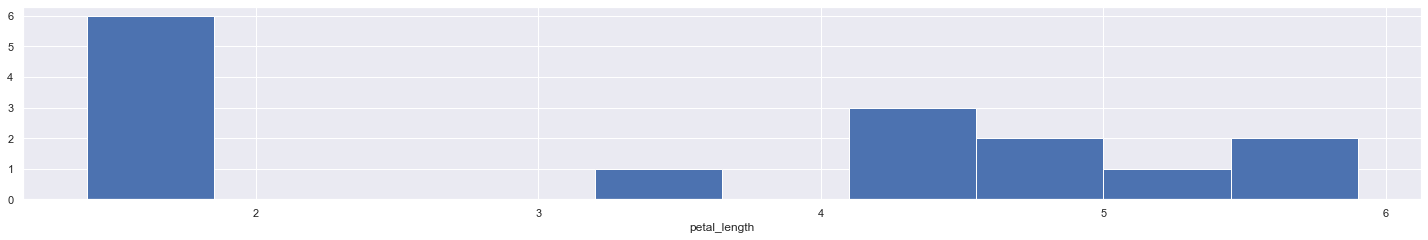

In [10]:
reservoir = reservoir_sampling(data.petal_length,15)

##plotting data with size M and printing values
for i in range(15):
    print(reservoir[i])
plot.hist(reservoir[0:15]) 
#plot label for x axis
plot.xlabel("petal_length") 
plot.show() 

### Question 3b: Stratified Sampling [20%]
1. Implement stratified sampling by class label, and within each stratum use the reservoir sampling function you implemented. [15%]
2. Run your stratified sampler with $M=5$ samples per class (so that we have 15 data points in total) and plot the histogram of the petal length feature for the sampled dataset [2.5%]
3. Do you observe any difference between the stratified and the non-stratified histograms? Which one resembles the original petal length distribution more closely? In order to answer this question you may want to run both sampling procedures a few times and observe which one gives a more accurate result on average. [2.5%]

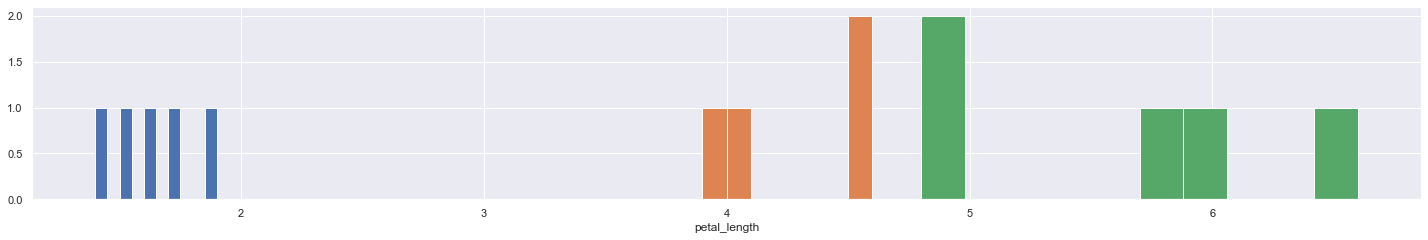

In [11]:
#your code here

#this function gets the data based on class labels
def stratified_sampling(stream, name):
    
    stratified_class = stream[data["label"]==name]
    
    return stratified_class

#getting stratified data
class1 = stratified_sampling(data, "Iris-setosa")
class2 = stratified_sampling(data, "Iris-versicolor")
class3 = stratified_sampling(data, "Iris-virginica")

#minor change to reservoir sampling function to implement stratified sampling
def stratified_reservoir_sampling(stream,M,class_label):
    
    #initializing/getting size of the stream
    size_of_stream = len(stream)
    
    #initializing array of size M for reservoir 
    reservoir = [0] * M
    
    #getting the correct class label
    if class_label==1: #Iris-setosa
        k=0
    elif class_label == 2: #Iris-versicolor
        k=50
    else:
        #class label = 3 #Iris-virginica
        k=100
        
 
    #appending data to the reservoir array 
    for i in range (M): 
        reservoir[i] = stream.petal_length[i+k]
    
    #changing position of reservoir if needed (chance)
    for j in range (M, size_of_stream):
        rand_x = rand.randint(0,j) 
        if rand_x < M:
            reservoir[rand_x] = stream.petal_length[j+k]
            
    return reservoir

#getting reservoir sampling value
srs1 = stratified_reservoir_sampling(class1,5,1)
srs2 = stratified_reservoir_sampling(class2,5,2)
srs3 = stratified_reservoir_sampling(class3,5,3)

#creating histogram to represent all data
fig,srs_hist = plot.subplots()
srs_hist.hist(srs1[0:5])
srs_hist.hist(srs2[0:5])
srs_hist.hist(srs3[0:5])

#plot label for x axis
plot.xlabel("petal_length")
plot.show()

Your answer here:
3. 